<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

 </center></font></h1>
<h2><font color='0B5345'> <center>
Bioseñales y Sistemas</center></font></h2>
<font  face="Courier New" size="3">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Práctica 4: Introducción al análisis frecuencial de señales </center></font></h2><font  face="Courier New" size="2">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Isabella Vásquez García </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1000.438.341 </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Marie Anne Johanna Bernal Diaz </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1003.894.043 </center></font></h2>
<font  face="Courier New" size="1">

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import ifft
import os
import glob
from google.colab import drive
import scipy.stats as stats
import scipy.io as sio
import pandas as pd
import scipy.signal as signal
from scipy.signal import welch, filtfilt
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



## **Señales en tiempo discreto**


**Compruebe que los valores de las primeras cinco muestras son los mismos**


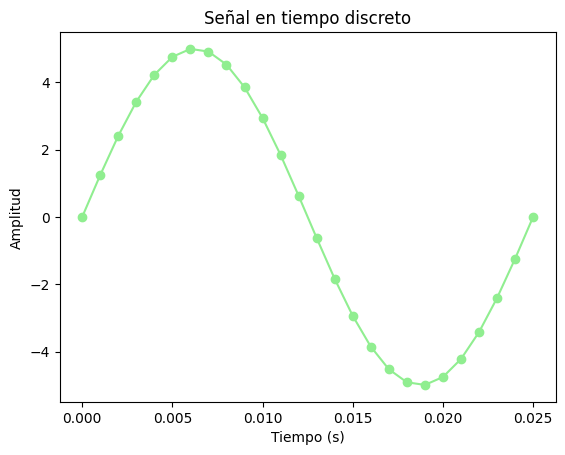

[0.         1.24344944 2.40876837 3.42273553 4.22163963]


In [ ]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o', color="lightgreen")
plt.title("Señal en tiempo discreto")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

# Del arreglo x, se sacan los primeros 5 valores que corresponden las primeras 5 muestras
x_5m = x[:5]
print(x_5m)

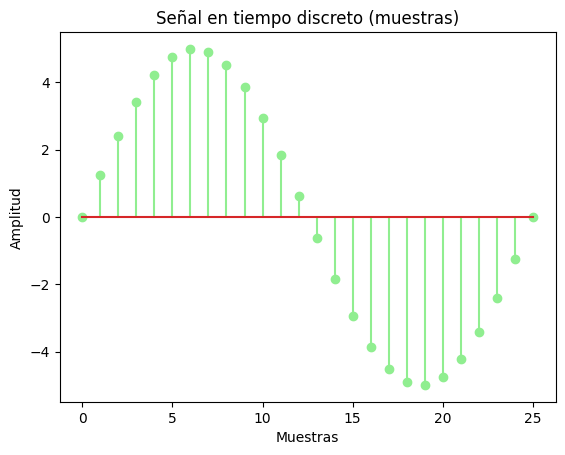

[0.         1.24344944 2.40876837 3.42273553 4.22163963]


In [ ]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.title("Señal en tiempo discreto (muestras)")
plt.stem(n, x1, linefmt="lightgreen")
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

# Del arreglo x1, se sacan los primeros 5 valores que corresponden las primeras 5 muestras
x1_5m = x1[:5]
print(x1_5m)

In [ ]:
# Para comparar si los dos arreglos son iguales
np.array_equal(x_5m,x1_5m)

True

Según lo anterior, los arreglos correspondientes a la señal representada en tiempo continuo y en tiempo discreto par las primeras 5 muestras son iguales.



---



## **Energía y potencia en el dominio del tiempo**

**La potencia es la misma que en x(n), ¿Por qué?**


Ya que ambas señales, la continua y la discreta provienen de la misma señal sinusoidal y que la potencia depende de la amplitud de estas señales que es la misma, la potencia debería ser la misma. Sin embargo, vamos a verificar lo anterior. Empezamos graficando las dos señales, la continua y la discreta.

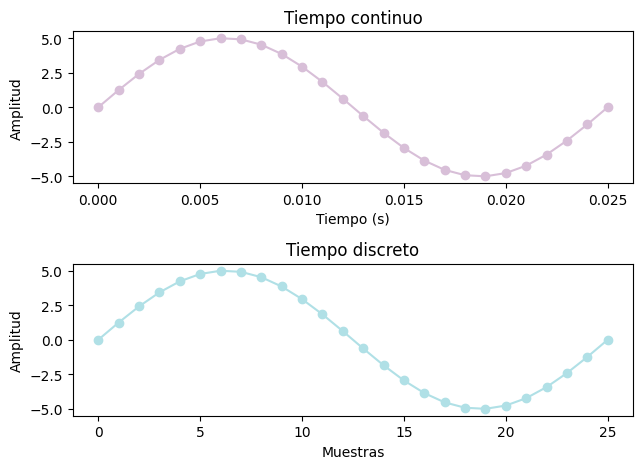

In [ ]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,x,marker='o', color="thistle")
plt.title('Tiempo continuo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2,1,2)
plt.plot(n,x1,marker='o', color='powderblue')
plt.title('Tiempo discreto')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

Ya que podemos visualizar que son las mismas, vamos a analizar su potencia en 1 y en 10 ciclos

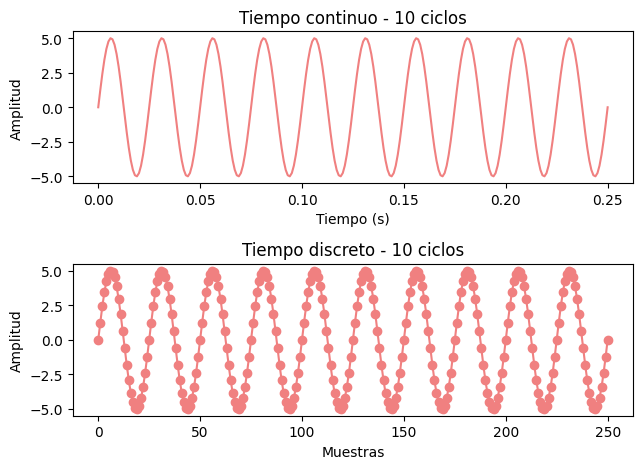

Comparación Energia en 1 ciclo: True
Comparación potencia en 1 ciclo: True
Comparación rms en 1 ciclo: True
Comparación Energia en 10 ciclo: False
Comparación potencia en 10 ciclo: False
Comparación rms en 10 ciclo: False


In [ ]:
energia_continua = sum(x**2)
potencia_continua = energia_continua/(len(t)-1) # Potencia media
rms_continua = np.sqrt(potencia_continua)

energia_discreta = sum(x1**2)
potencia_discreta = energia_discreta/(len(n)-1) # Potencia medi
rms_discreta = np.sqrt(potencia_discreta)

t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)

n10 = np.arange(0,len(t10))
x1_10 = A*np.sin(2*np.pi*fo*n10)

energia10_continua = sum(x10**2)
potencia10_continua = energia10_continua/(len(t10)-1)
rms10_continua = np.sqrt(potencia10_continua)

energia10_discreta = sum(x1_10**2)
potencia10_discreta = energia10_discreta/(len(t10)-1)
rms10_discreta = np.sqrt(potencia10_discreta)

plt.figure()
plt.subplot(2,1,1)
plt.plot(t10,x10,color='lightcoral')
plt.title('Tiempo continuo - 10 ciclos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2,1,2)
plt.plot(n10,x1_10,marker='o', color='lightcoral')
plt.title('Tiempo discreto - 10 ciclos')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

print('Comparación Energia en 1 ciclo:',energia_continua == energia_discreta)
print('Comparación potencia en 1 ciclo:',potencia_continua == potencia_discreta)
print('Comparación rms en 1 ciclo:',rms_continua == rms_discreta)

print('Comparación Energia en 10 ciclo:',energia10_continua == energia10_discreta)
print('Comparación potencia en 10 ciclo:',potencia10_continua == potencia10_discreta)
print('Comparación rms en 10 ciclo:',rms10_continua == rms10_discreta)





---



Podemos evidencias que, para 1 ciclo los valores de energía, potenicia y rms son iguales como se teorizó inicialmente. Sin embargo, a medida que aumentamos el número de ciclos, en este caso para 10 ciclos, lo valores ya no son iguales debido a la pérdida de información al aumentar la cantidad de datos a analizar en la señal discreta.

## **Aplicación**

####**1. Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente**

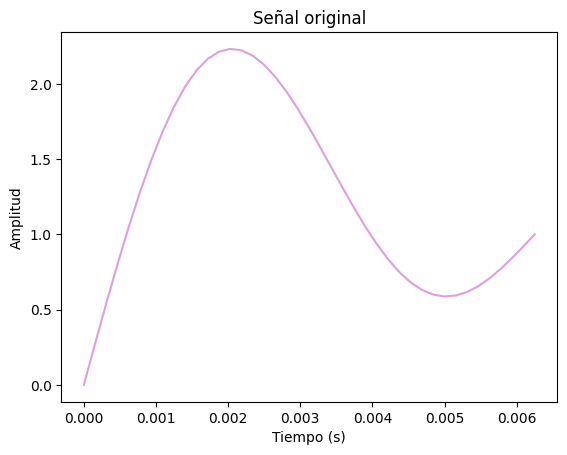

In [ ]:
# Frecuencia fundamental = frecuencia máxima
F = 160
# Periodo fundamental
T = 1/F
# Frecuencia de muestreo mayor o igual que dos veces la frecuencia máxima (Según Nyquist)
Fs = F*40
# Periodo de muestreo
Ts = 1/Fs
# Definiendo el vector de tiempo
t = np.arange(0, T+Ts, Ts)
# Definiendo la suma se sinosoides
A = 1
signal = (A*np.sin(2*np.pi*40*t)) + (A*np.sin(2*np.pi*80*t)) + (A*np.sin(2*np.pi*160*t))
# Gráfica
plt.plot(t, signal, color="plum")
plt.title("Señal original")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

Según lo evidenciado anteriormente, la frecuencia de muestreo mínima para representar la señal es 40 veces la frecuencia fundamental (que es este caso es la frecuencia máxima entre las señales sinosoidales sumadas), ya que es posible ver una señal seno suavizada al utilizar este valor de frecuencia.

####**2 Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal)**

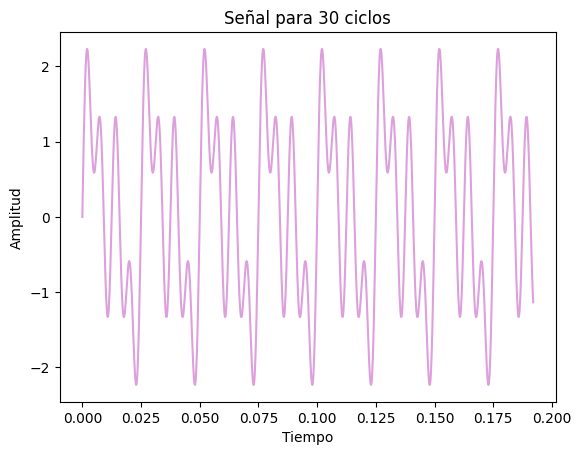

In [ ]:
# Definiendo el vector de tiempo para mostrar 10 ciclos
t_30 = np.arange(0, 30*(T+Ts), Ts)
# Definiendo la suma se sinosoides
A = 1
signal_30 = (A*np.sin(2*np.pi*40*t_30)) + (A*np.sin(2*np.pi*80*t_30)) + (A*np.sin(2*np.pi*160*t_30))

# Gráfica para 10 ciclos
plt.plot(t_30, signal_30, color="plum")
plt.title("Señal para 30 ciclos")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()

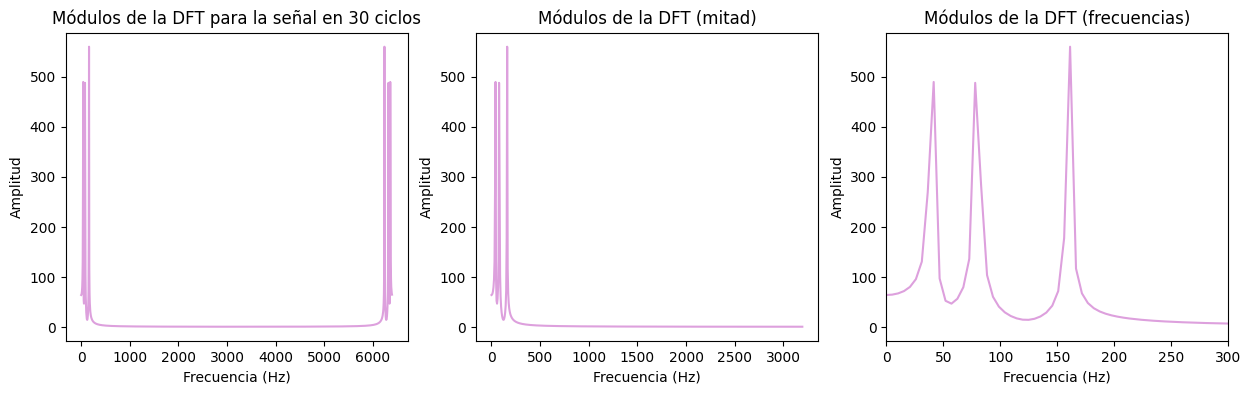

In [ ]:
# Calculando la transformada discreta de Fourier
fft_signal = np.fft.fft(signal_30)
# Para graficar los módulos de la DFT
N = len(fft_signal)
F = np.arange(0,N)*Fs/N

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.plot(F,abs(fft_signal), color="plum")
ax1.set_title('Módulos de la DFT para la señal en 30 ciclos')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Amplitud')

Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = fft_signal[0:Nmitad]
ax2.plot(Fmitad,abs(X10mitad), color="plum")
ax2.set_title('Módulos de la DFT (mitad)')
ax2.set_ylabel('Amplitud')
ax2.set_xlabel('Frecuencia (Hz)')

ax3.plot(Fmitad, abs(X10mitad),color="plum")
ax3.set_title('Módulos de la DFT (frecuencias)')
ax3.set_ylabel('Amplitud')
ax3.set_xlabel('Frecuencia (Hz)')
ax3.set_xlim(0,300)
plt.show()

Finalmente, en el espectro de frecuencias se puede evidenciar picosen las frecuencias 40Hz, 80 Hz y 160Hz.



---



####**3. Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier.**

La función para encontrar la transformada inversa de Fourier en NumPy es np.fft.ifft(). La cual toma como argunmentos el espectro de frecuencias y develve la señal original [3].


####**Aplíquelo a la señal anterior**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


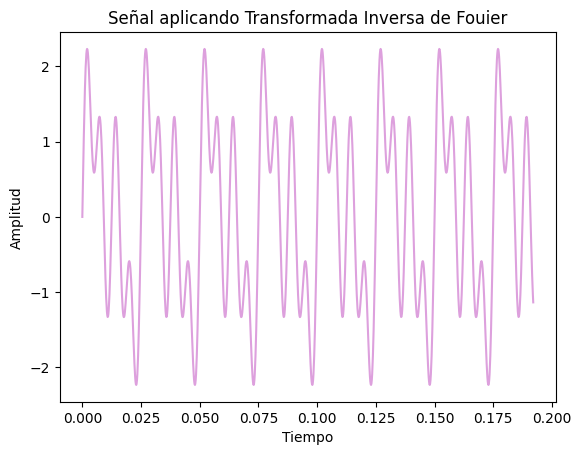

In [ ]:
fourier_inversa = np.fft.ifft(fft_signal)
plt.plot(t_30,fourier_inversa, color="plum")
plt.title('Señal aplicando Transformada Inversa de Fouier')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.show()



---



####**4. ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?**

<ipython-input-54-9cbdb76b1460>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[9:13] = F1[9:13];


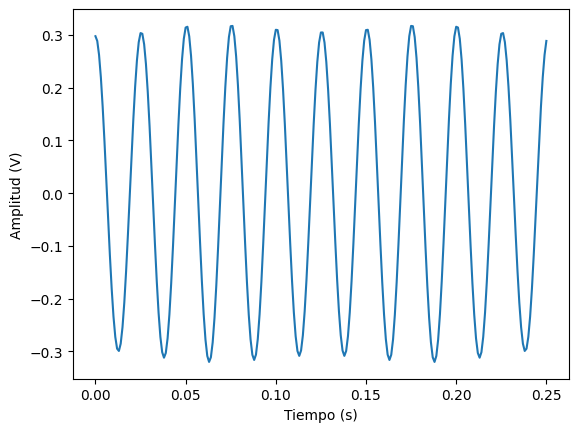

In [ ]:
F1 = np.fft.fft(x10);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t10, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');

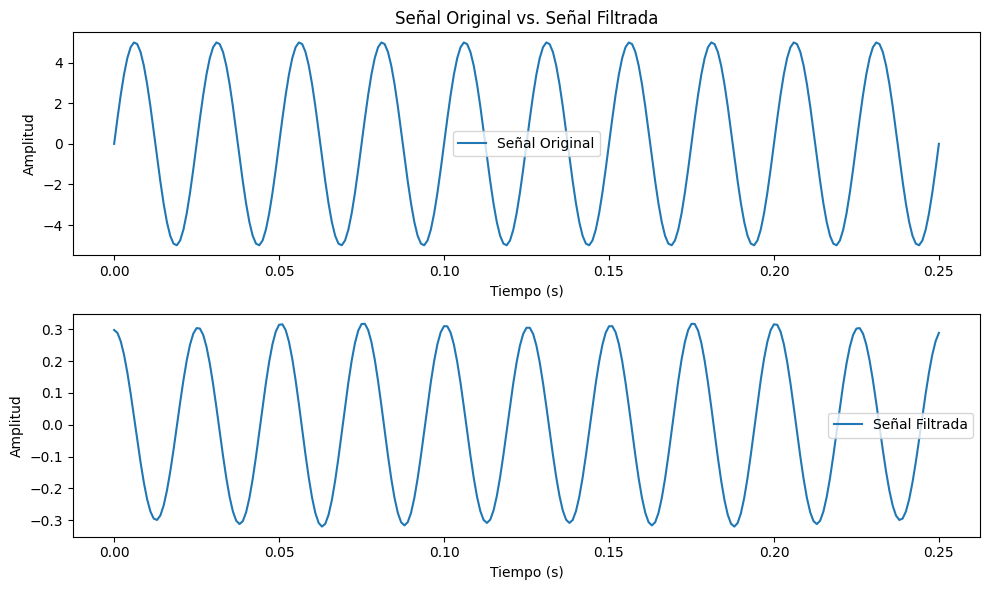

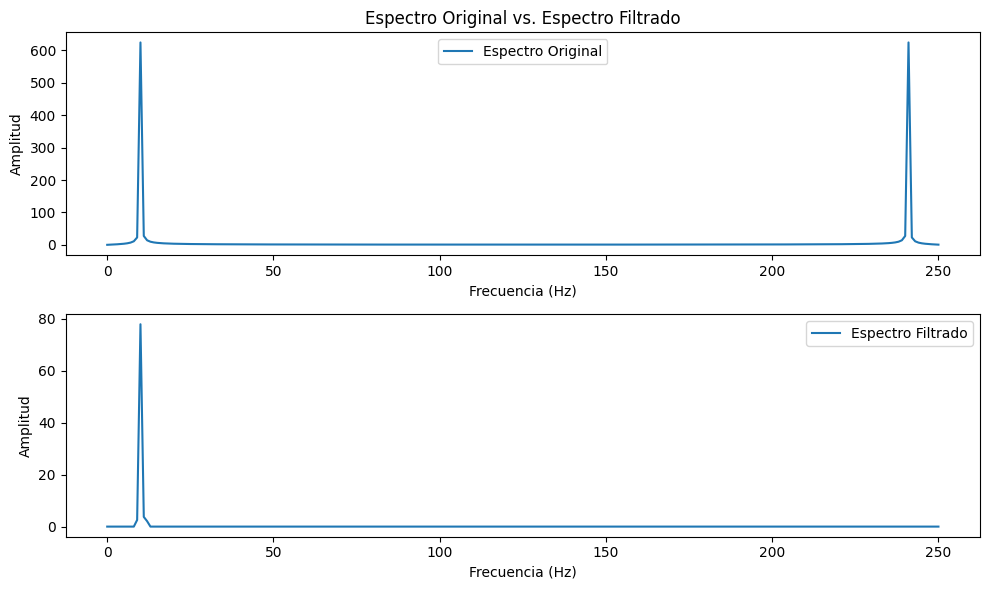

In [ ]:
# Graficamos la señal original y la señal después del proceso de filtro.
plt.figure(figsize=(9, 3))
plt.subplot(2, 1, 1)
plt.plot(t10, x10, label='Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Original vs. Señal Filtrada')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t10, np.real(xr), label='Señal Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.tight_layout()
plt.show()

# Graficamos el espectro de frecuencia de la señal original y la señal filtrada.
F1_abs = np.abs(F1)
F2_abs = np.abs(F2)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(F1_abs)), F1_abs, label='Espectro Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro Original vs. Espectro Filtrado')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(F2_abs)), F2_abs, label='Espectro Filtrado')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.tight_layout()
plt.show()

Las lineas de código anteriores actúan como un filtro al limitar los datos que ingresan desde F1 hasta F2, siendo estos los únicos que se conservan en F2 tras pasar por el proceso de la transformada de fourier y la transformada inversa. Podía acercarse al funcionamiento de un filtro pasa banda.

####**Extraiga de manera similar cada una de las componentes de la señal**

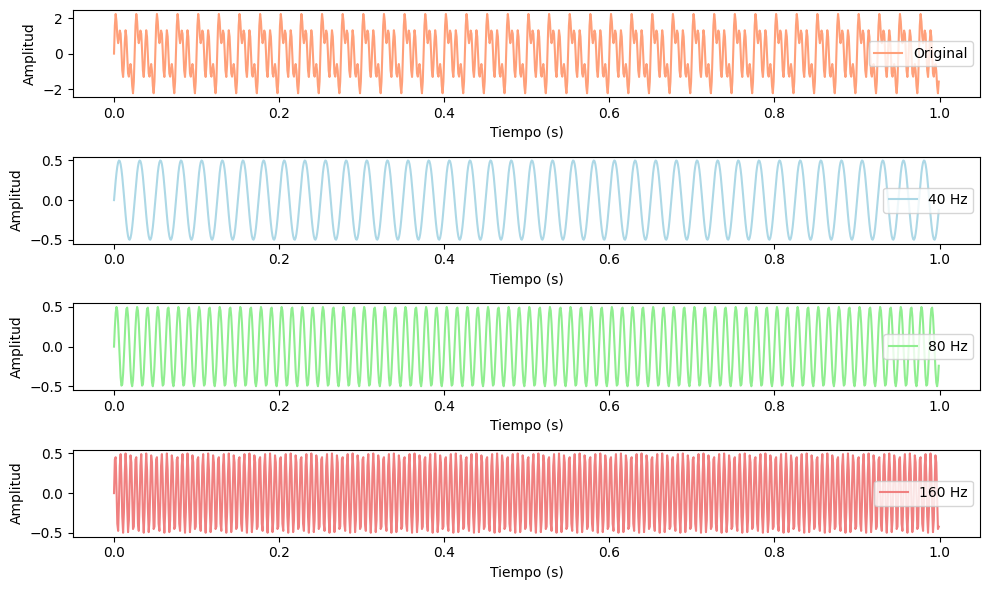

In [ ]:
A =1
Fs = 1000
T = 1/Fs
t = np.arange(0,1,T)
signal_ = (A*np.sin(2*np.pi*40*t)) + (A*np.sin(2*np.pi*80*t)) + (A*np.sin(2*np.pi*160*t))
# Càlculo de la FFT de la señal

fft_signal=np.fft.fft(signal_)
N=len(fft_signal)
freq= np.fft.fftfreq(N,T) # Vector de frecuencias
# Necesitamos extraer cada una de las frecuencias
# Componente de 40 Hz: Identificamos la posición en el vector de frecuencias donde se encuentra esta frecuencia y filtramos las otras

fft_40 =np.zeros(N,dtype=complex)
# Frecuencias por encima y por debajo de la frecuencia de interés
idx_40 = np.where((freq >= 40-1) & (freq <= 40+1))
fft_40 [idx_40]=fft_signal[idx_40]

# Aplicamos la transformada inversa pra obtener la señal filtrada
signal_40=np.fft.ifft(fft_40)

# Realizamos el mismo procedimiento para las señales de 80 hz

fft_80 =np.zeros(N,dtype=complex)
# Frecuencias por encima y por debajo de la frecuencia de interés
idx_80 = np.where((freq >= 80-1) & (freq <= 80+1))
fft_80 [idx_80]=fft_signal[idx_80]

# Aplicamos la transformada inversa pra obtener la señal filtrada
signal_80=np.fft.ifft(fft_80)

# Realizamos el mismo procedimiento para las señales de 160 hz

fft_160 =np.zeros(N,dtype=complex)
# Frecuencias por encima y por debajo de la frecuencia de interés
idx_160 = np.where((freq >= 160-1) & (freq <= 160+1))
fft_160 [idx_160]=fft_signal[idx_160]

# Aplicamos la transformada inversa pra obtener la señal filtrada
signal_160=np.fft.ifft(fft_160)

# Gráficas

plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(t, np.real(signal_), color="lightsalmon", label='Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, np.real(signal_40), color="lightblue", label='40 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t, np.real(signal_80), color="lightgreen", label='80 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, np.real(signal_160), color="lightcoral", label='160 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()


Dado que la señal original es una suma de tres ondas senoidales, el resultado es una mezcla armónica de componentes de diferentes frecuencias (40 Hz, 80 Hz y 160 Hz). Al extraer cada una de estas componentes, podemos observar que, a medida que aislamos las frecuencias más altas, aumenta el número de oscilaciones por unidad de tiempo. Este proceso demuestra cómo la FFT permite identificar y separar las diferentes frecuencias presentes en la señal original de manera efectiva.



---



####**5. El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)**

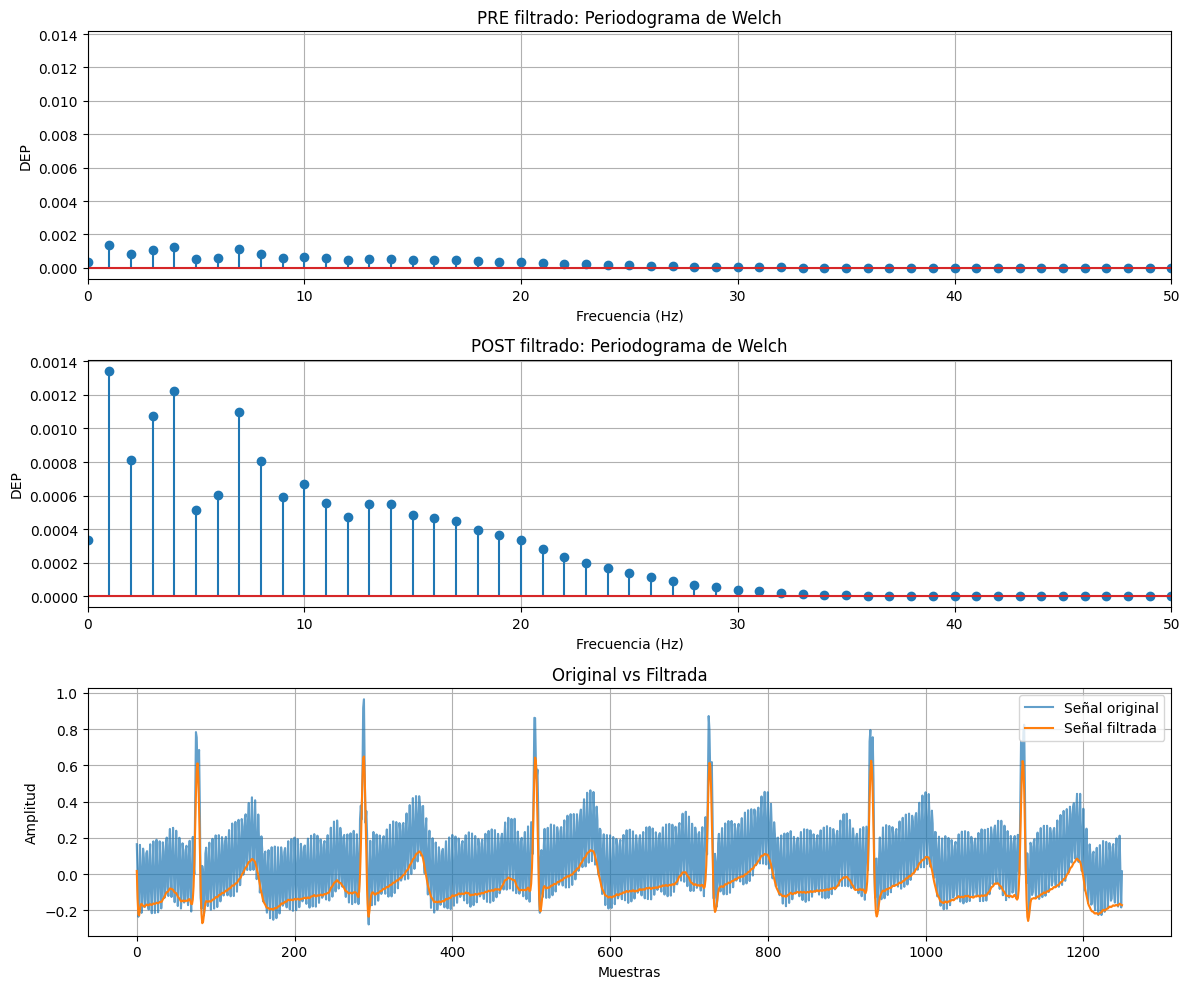

In [ ]:
import scipy.signal as signal
data = sio.loadmat('/content/senecg.mat')   #Cargamos el archivo

#data = sio.loadmat('/content/drive/MyDrive/Bioseñales/Laboratorio Bioseñales/Prácticas /Práctica 5/senecg.mat')   #Cargamos el archivo
ecg_signal = data['ECG'].flatten()      #Extraer la señal ECG
fs = 250                                #Frecuencia de muestreo (Hz)
      # Configuración del periodograma
nperseg = fs  # Ventana de 1 segundo
noverlap = nperseg // 2  # 50% de solapamiento

      # Primer periodograma (Pre-filtrado)
f, Pxx = welch(ecg_signal, fs, window='hann', nperseg=nperseg, noverlap=noverlap)

      # Diseño de filtros según estándares
      # Filtro pasa-altas (elimina deriva de línea base)
f_corte_alta = 0.05  # 0.05
order_hp = 2
b_hp, a_hp = signal.butter(order_hp, f_corte_alta/(0.5*fs), btype='high')

      # Filtro pasa-bajas (elimina ruido de alta frecuencia)
f_corte_baja = 40  # 40 Hz
order_lp = 4  # Orden mayor para mejor atenuación
b_lp, a_lp = signal.butter(order_lp, f_corte_baja/(0.5*fs), btype='low')

      # Aplicación de filtros en cascada
ecg_hp = filtfilt(b_hp, a_hp, ecg_signal)  # Primero pasa-altas
ecg_filtr = filtfilt(b_lp, a_lp, ecg_hp)   # Luego pasa-bajas

      # Segundo periodograma (Post-filtrado)
f_, Pxx_ = welch(ecg_filtr, fs, window='hann', nperseg=nperseg, noverlap=noverlap)

      # Visualización
plt.figure(figsize=(12, 10))

      # Periodograma pre-filtrado
plt.subplot(3,1,1)
plt.stem(f, Pxx)
plt.title("PRE filtrado: Periodograma de Welch")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("DEP")
plt.xlim([0, 50])
plt.grid()

      # Periodograma post-filtrado
plt.subplot(3,1,2)
plt.stem(f_, Pxx_)
plt.title("POST filtrado: Periodograma de Welch")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("DEP")
plt.xlim([0, 50])
plt.grid()

      # Comparación temporal
plt.subplot(3,1,3)
plt.plot(ecg_signal, label='Señal original', alpha=0.7)
plt.plot(ecg_filtr, label='Señal filtrada')
plt.legend(loc='upper right')
plt.title("Original vs Filtrada")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()

plt.tight_layout()
plt.show()

Ya que en este caso el periodiogrma de Welch me sirve para analizar la distribución de la potencia de las frecuencias en la señal de ECG. Podemos observar que la mayoría de la potencia está concentrada en frecuencias bajas.Por lo que en este caso, el filtro pasa-altas fué aplicado con una frecuencia de corte de 0.5 Hz para eliminar la mayor parte de la derivada de la linea base y las interferencias a bajas frecuencias, como los movimientos respiratorios, sin afectar los componentes claves de la señal ECG. Por otro lado, el fltro pasa bajas de 40 Hz suele evitar el ruido producido por los mùsculos y artefactos de alta frecuencias. Finalmente, el uso de un filtro Butterworth de cuarto orden para el pasa bajas asegura una transición suave entre la banda de paso y la banda de rechazo, preservando las formas de onda del ECG mientras que el orden 2 del filtro pasa altas es suficiente para eliminar la derivada de la línea base sin afectar las componenetes de baja frecuencia de interés. En cuanto al solapamiento del 50%, esta combinación optimiza la reducción de la varianza del estimador espectral sin comprometer la resolución en frecuencia. Este valor de solapamiento es un estándar en el procesamiento de señales al permitir una mejor estimación de la densidad espectral de potencia al promediar segmentos consecutivos [5].

#### **6.  Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)**



---



De las señales utilizadas en la práctica 3, se seleccionaros dos sujetos, uno control y un con parkinson de forma aleatoria.

Al realizar un análisis de los canales de cada señal en la práctica 3, no se encontraron diferencias, por lo que se seleccionó el canal 6 para realizar el análisis en frecuencias


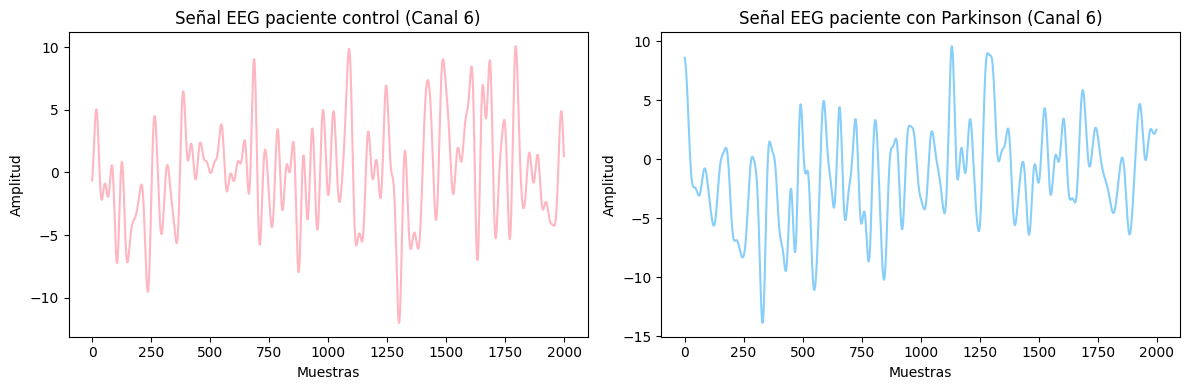

In [ ]:
# Ruta a las carpetas con los archivos .mat
ruta_archivo_control = "/content/drive/MyDrive/Bioseñales/Laboratorio Bioseñales/Prácticas /Práctica 5/C049_EP_reposo.mat"
ruta_archivo_parkinson = "/content/drive/MyDrive/Bioseñales/Laboratorio Bioseñales/Prácticas /Práctica 5/P049_EP_reposo.mat"
# Cargar los archivos .mat
control = sio.loadmat(ruta_archivo_control)
control_data = control['data']
parkinson = sio.loadmat(ruta_archivo_parkinson)
parkinson_data = parkinson['data']

# Se realiza un reshape de las señales con el fin de obtener una señal continua
senal_continua_control=np.reshape(control_data,(control_data.shape[0],control_data.shape[1]*control_data.shape[2]),order="F")
senal_continua_parkinson=np.reshape(parkinson_data,(parkinson_data.shape[0],parkinson_data.shape[1]*parkinson_data.shape[2]),order="F")

# Cada señal continua tiene 8 canales, por lo que se extrae el canal 6 de cada señal
senal_continua_control_C_6 = senal_continua_control[5,:]
senal_continua_parkinson_C_6 = senal_continua_parkinson[5,:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(senal_continua_control_C_6[0:2000], color = 'lightpink')
ax1.set_title('Señal EEG paciente control (Canal 6)')
ax1.set_xlabel('Muestras')
ax1.set_ylabel('Amplitud')

ax2.plot(senal_continua_parkinson_C_6[0:2000], color = 'lightskyblue')
ax2.set_title('Señal EEG paciente con Parkinson (Canal 6)')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Amplitud')

plt.tight_layout()
plt.show()

Respecto a la frecuencia de muestreo, debido a que las señales de EEG estan entre 1Hz y 100 Hz [1], se determinó usar el teorema de Nyquist. Así pues, la frecuencia de muestreo sería mayor a 200 Hz, pero debido a que se han determinado en la literatura que las frecuencias de la onda gamma pueden llegar hasta los 600 Hz [2], se decidió utiliza una frecuencia de muestreo de fs = 1200 Hz.

Por otro lado, en un estudio donde se midió el deterioro cognitivo en la enfermedad de Parkinson a través de señales de EEG en reposo, utilizaron el periodograma de Welch para medir el espectro de potencia en cada banda (banda delta (0–4 Hz), banda theta (4–8 Hz), banda alfa (8–13 Hz) y banda beta (13–30 Hz)), utilizando superposición del 50 % entre segmentos con ventana de Hanning de 1sg [4]. Según lo anterior, se decidió realizar una comparación de la potencia en cada banda con el fin de determinar diferencias entre los dos grupos a evaluar utilizando las características mencionadas anteriormente.

(0.0, 70.0)

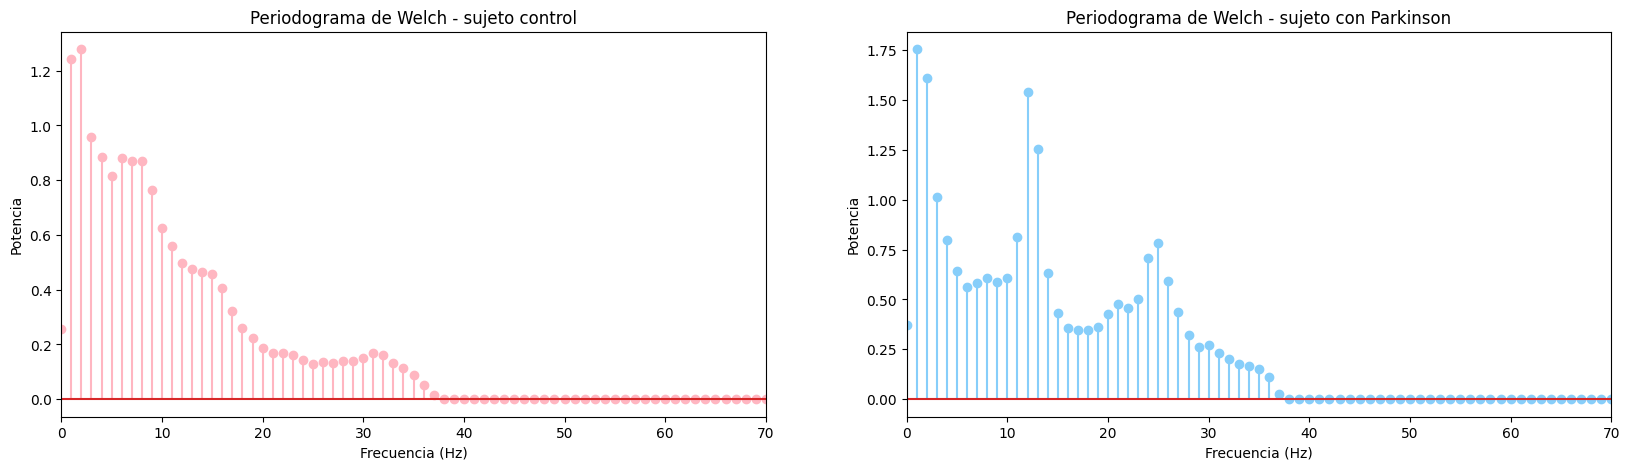

In [ ]:
fs = 1200 # Frecuencia de muestreo de la señal EEG
nperseg = 1200 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f_control, power_control = welch(senal_continua_parkinson_C_6, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)
f_parkinson, power_parkinson = welch(senal_continua_control_C_6, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.stem(f_control, power_control, linefmt='lightpink')
ax1.set_ylabel('Potencia')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_title("Periodograma de Welch - sujeto control")
ax1.set_xlim(0,70)

ax2.stem(f_parkinson, power_parkinson, linefmt='lightskyblue')
ax2.set_ylabel('Potencia')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_title("Periodograma de Welch - sujeto con Parkinson")
ax2.set_xlim(0,70)


Respecto al ancho de la ventana, tal como se indicó anteriormente, se decidió utilizar una ventana de Hanning de 1s, lo cual es común en señales de EEG [4], por lo que el ancho de la ventana se determinó igual que la frecuencia de muestreo

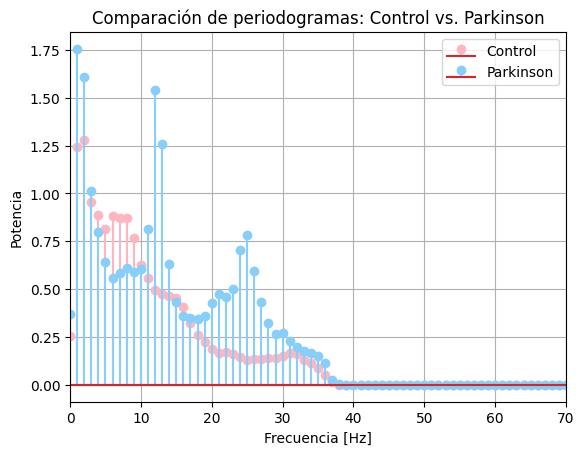

In [ ]:
plt.stem(f_control, power_control, linefmt='lightpink', label='Control')
plt.stem(f_parkinson, power_parkinson, linefmt='lightskyblue', label='Parkinson')
plt.xlim([0, 70])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.title('Comparación de periodogramas: Control vs. Parkinson')
plt.grid()
plt.legend()
plt.show()

Respecto al gráfico comparativo que se mostró anteriormente, no se evidenció frecuencias en 60 Hz, lo que determina que se realizó un filtrado de la señal para eliminar esta interferencia

Por otro lado, es posible identificar las diferentes bandas de frecuencia características en las señales de EEG. Así mismo, respecto a lo anterior, se evidencia que ciertas bandas cuentan con mayores valores de potencia respecto al grupo control. Lo anterior sucede por ejemplo, en las bandas delta (0.5 - 4Hz)y beta (12.5 - 30 Hz) en donde, para el grupo con parkinson algunas frecuencias tuvieron mayor potencia.


## **Conclusiones**




*  Los resultados obtenidos demuestran que el análisis espectral de potencia es una herramienta eficaz para discriminar entre grupos de pacientes, dado que permite realizar un análisis de señales biológicas. Además, permite identificar la presencia de filtros en las señales, como se observó en los registros de EEG, donde se filtraron las frecuencias de la red eléctrica (50/60 Hz).
*   La elección del ancho de ventana en el periodograma de Welch es crucial para obtener una buena resolución espectral y caracterizar adecuadamente las frecuencias presentes en la señal.
*   El análisis de bioseñales en el dominio de frecuencia puede resultar ser más sencillo que realidar  un análisis en el dominio del tiempo, facilitando la identificación de patrones y características específicas de las señales. Además, la transformada inversa de Fourier permite reconstruir la señal original a partir de su espectro de frecuencia.


##**Referencias**

[1]	T. Hodnik, S. Roytman, N. I. Bohnen, and U. Marusic, “Beta–gamma phase-amplitude coupling as a non-invasive biomarker for Parkinson’s disease: Insights from electroencephalography studies,” Life (Basel), vol. 14, no. 3, p. 391, 2024.


[2] A. Pevzner, A. Izadi, D. J. Lee, K. Shahlaie, and G. G. Gurkoff, “Making waves in the brain: What are oscillations, and why modulating them makes sense for brain injury,” Front. Syst. Neurosci., vol. 10, 2016.


[3] “Numpy.Fft.Ifft — NumPy v2.1 manual,” Numpy.org. [Online]. Available: https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html. [Accessed: 22-Oct-2024].


[4] Terranova, R., Cicero, CE, Garofalo, R. et al. EEG cuantitativo en la enfermedad de Parkinson: cuándo el inicio del trastorno de conducta durante el sueño REM realmente importa. J Neural Transm 131 , 1039–1046 (2024). https://doi-org.udea.lookproxy.com/10.1007/s00702-024-02809-8


[5] R. Kher, "Signal Processing Techniques for Removing Noise from ECG Signals," J. Biomed. Eng. Res., vol. 1, pp. 1-9, Mar. 2019. [Online]. Available: http://creativecommons.org/licenses/by/3.0/. [Accessed: 24-Oct-2024].